In [1]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-_ytafdlp
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-_ytafdlp
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit eb7bdfc047de3e7af972b4ee7cf23a7968b7daa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive')
bdd=pd.read_csv('/content/drive/My Drive/bdd.csv', index_col=0, parse_dates=True)
#bdd=bdd.iloc[:,:6]
taux_change=pd.read_csv('/content/drive/My Drive/taux_change.csv', index_col=0, parse_dates=True)
taux_change.drop(columns=['EUR/CHF'],inplace=True)
display(bdd)

taux_change_ajuste=taux_change.iloc[:-299,]
#Calculer la variation d'une ligne a une autre
var_taux_change=taux_change_ajuste.pct_change().iloc[1:,]

#taux_change.isna().any(axis=1).sum()
# Affichage des premières lignes du DataFrame final
display(var_taux_change)


Mounted at /content/drive


,SR_1Y,SR_3Y,SR_5Y,SR_10Y,SR_20Y,SR_30Y,STOX50,S&P500
Date,,,,,,,,
2007-03-30,3.921181,3.932365,3.927126,4.024396,4.193160,4.268851,4181.029785,1420.859985
2007-04-02,3.934280,3.956157,3.945002,4.030000,4.204120,4.287639,4189.549805,1424.550049
2007-04-03,3.941438,3.968073,3.966270,4.064232,4.234304,4.311176,4246.299805,1437.770020
2007-04-04,3.936594,3.947791,3.944578,4.052252,4.234595,4.315807,4261.830078,1439.369995
2007-04-05,3.938785,3.954474,3.953399,4.060667,4.239597,4.319013,4271.540039,1443.760010
...,...,...,...,...,...,...,...,...
2024-06-14,3.107870,2.541109,2.338506,2.408687,2.653216,2.531207,4839.140137,5431.600098
2024-06-17,3.115303,2.586249,2.404907,2.487404,2.706389,2.561350,4880.419922,5473.229980
2024-06-18,3.121078,2.586010,2.400618,2.476221,2.689464,2.546050,4915.470215,5487.029785


,EUR/USD,EUR/GBP,EUR/JPY,EUR/AUD
Date,,,,
2004-12-02,-0.006365,-0.001738,-0.000950,-0.002041
2004-12-03,0.015459,0.005079,0.005487,0.005492
2004-12-06,-0.005198,-0.002166,0.005239,0.006333
2004-12-07,0.002606,-0.001013,0.000072,-0.000346
2004-12-08,-0.006392,-0.002462,0.004343,0.018482
...,...,...,...,...
2023-04-25,0.006116,0.001846,0.006778,0.004348
2023-04-26,-0.007334,-0.000509,-0.009815,0.002928
2023-04-27,0.006275,0.001674,0.004047,0.010296


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")



config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [4]:
df=bdd.reset_index()
display(df)

,Date,SR_1Y,SR_3Y,SR_5Y,SR_10Y,SR_20Y,SR_30Y,STOX50,S&P500
0,2007-03-30,3.921181,3.932365,3.927126,4.024396,4.193160,4.268851,4181.029785,1420.859985
1,2007-04-02,3.934280,3.956157,3.945002,4.030000,4.204120,4.287639,4189.549805,1424.550049
2,2007-04-03,3.941438,3.968073,3.966270,4.064232,4.234304,4.311176,4246.299805,1437.770020
3,2007-04-04,3.936594,3.947791,3.944578,4.052252,4.234595,4.315807,4261.830078,1439.369995
4,2007-04-05,3.938785,3.954474,3.953399,4.060667,4.239597,4.319013,4271.540039,1443.760010
...,...,...,...,...,...,...,...,...,...
4216,2024-06-14,3.107870,2.541109,2.338506,2.408687,2.653216,2.531207,4839.140137,5431.600098
4217,2024-06-17,3.115303,2.586249,2.404907,2.487404,2.706389,2.561350,4880.419922,5473.229980
4218,2024-06-18,3.121078,2.586010,2.400618,2.476221,2.689464,2.546050,4915.470215,5487.029785
4219,2024-06-20,3.122241,2.619089,2.439401,2.509393,2.730863,2.592950,4947.729980,5473.169922


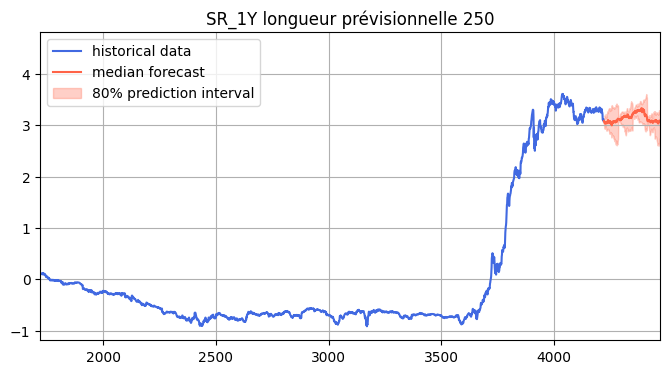

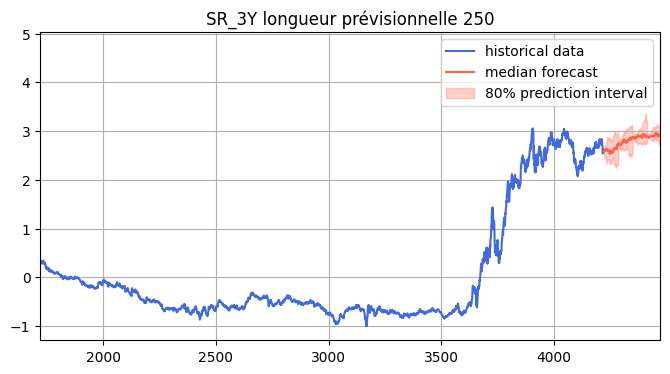

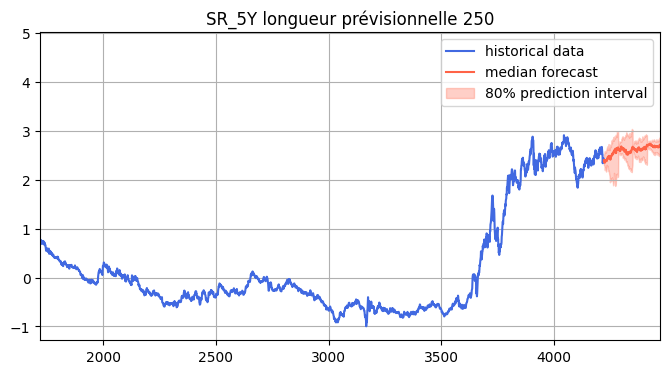

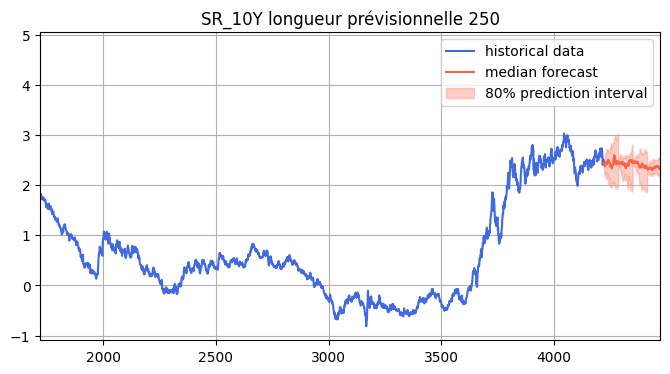

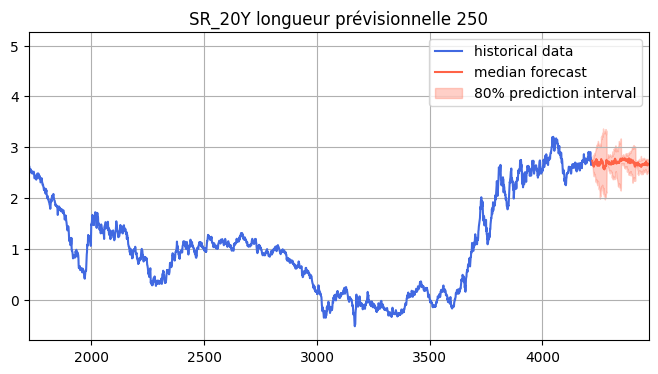

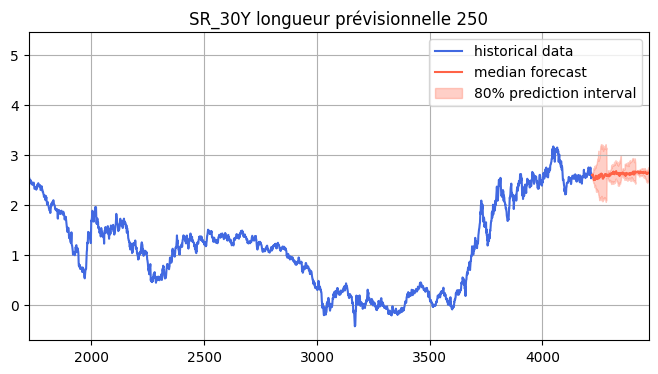

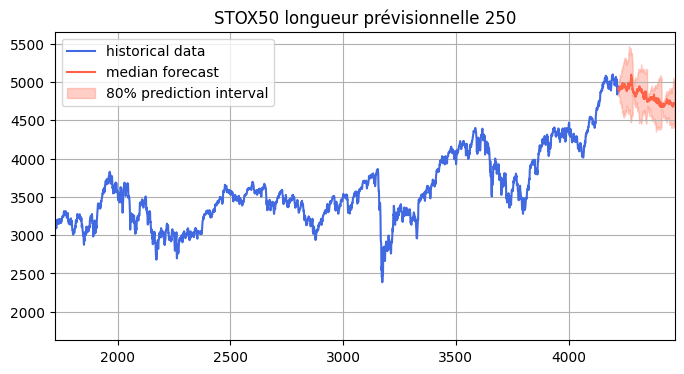

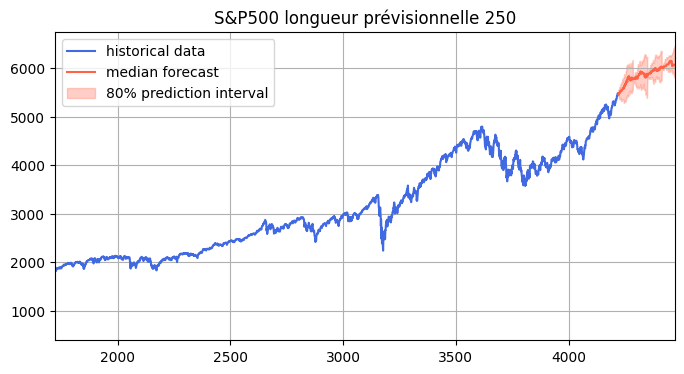

In [7]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
for column in df.columns[1:]:

  context = torch.tensor(df[column])
  prediction_length = 250
  forecast = pipeline.predict(context, prediction_length,limit_prediction_length=False)  # shape [num_series, num_samples, prediction_length]

  # visualize the forecast
  forecast_index = range(len(df), len(df) + prediction_length,)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

  plt.figure(figsize=(8, 4))
  plt.plot(df[column], color="royalblue", label="historical data")
  plt.plot(forecast_index, median, color="tomato", label="median forecast")
  plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
  plt.xlim(len(df)-10*prediction_length, len(df)+prediction_length)
  plt.title(f'{column} longueur prévisionnelle {prediction_length}')
  plt.legend()
  plt.grid()
  plt.show()


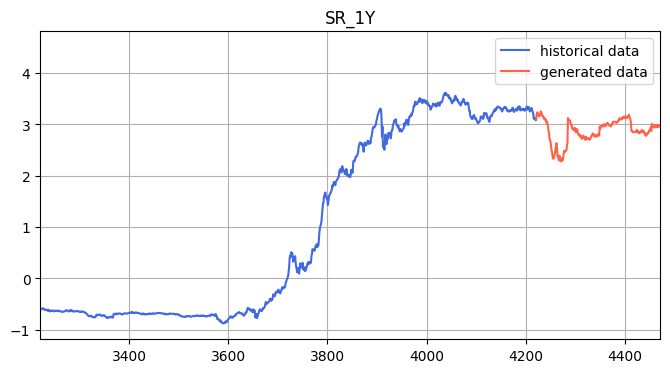

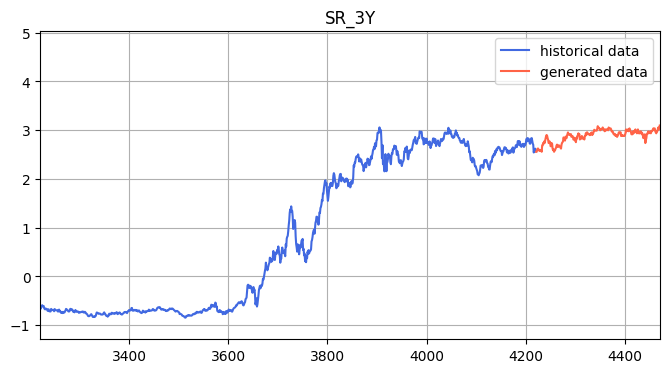

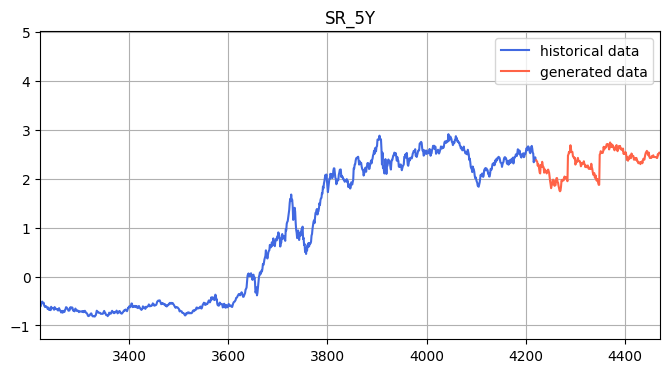

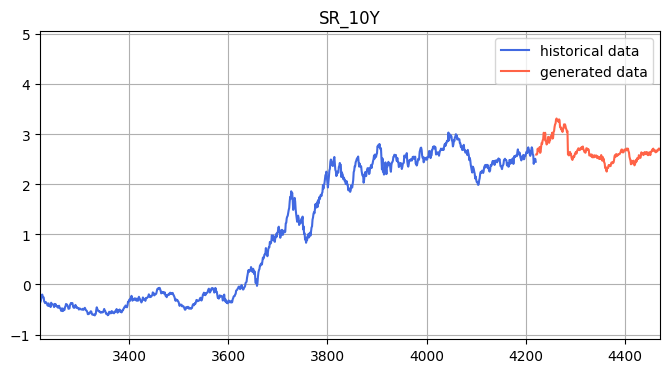

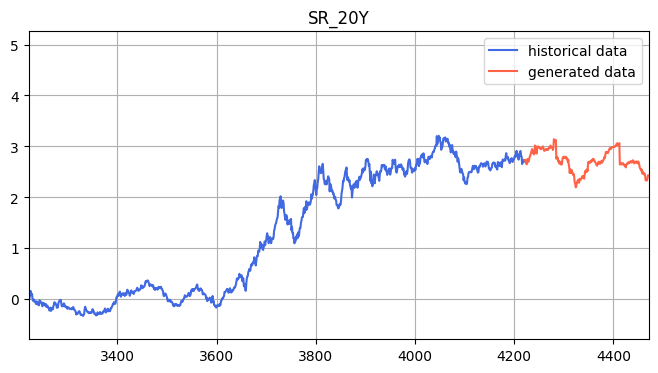

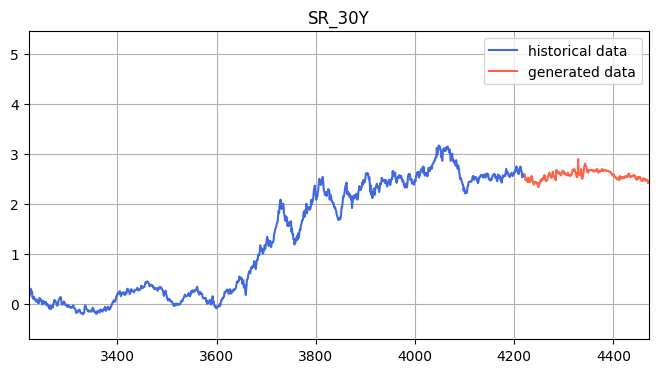

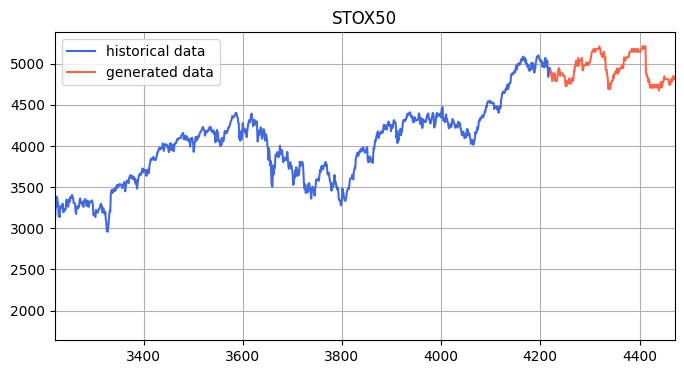

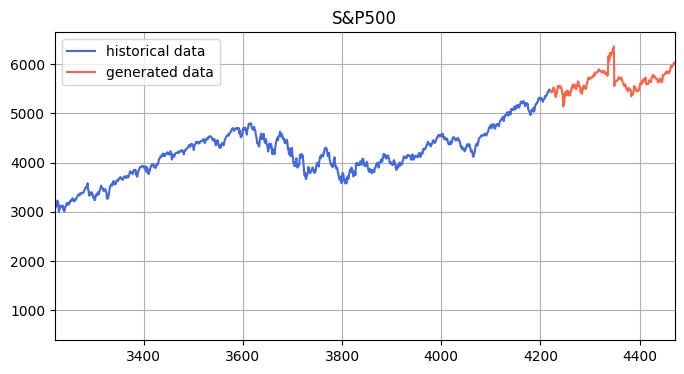

In [23]:
nb_scenario=1
for column in df.columns[1:]:
  plt.figure(figsize=(8, 4))
  context = torch.tensor(df[column])
  prediction_length = 250
  forecast = pipeline.predict(context, prediction_length,limit_prediction_length=False)  # shape [num_series, num_samples, prediction_length]

  # visualize the forecast
  forecast_index = range(len(df), len(df) + prediction_length,)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)


  for i in range(nb_scenario):


    plt.plot(df[column], color="royalblue", label="historical data")
    plt.plot(forecast_index, forecast[0].numpy()[i], color="tomato", label="generated data",alpha=1)
    plt.xlim(len(df)-4*prediction_length, len(df)+prediction_length)
    #plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")

  plt.legend()
  plt.title(column)
  plt.grid()
  plt.show()

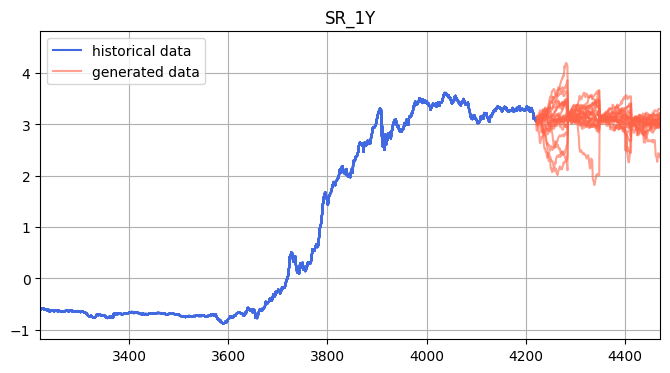

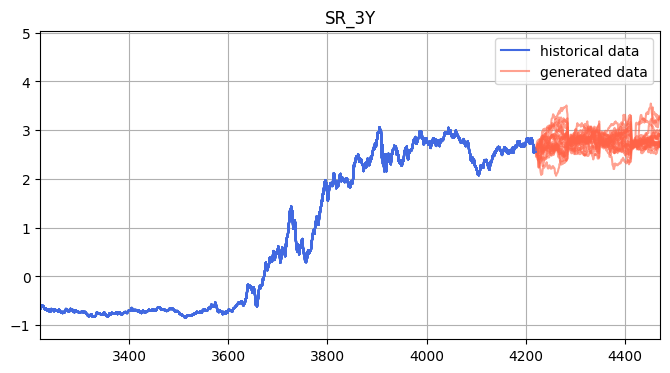

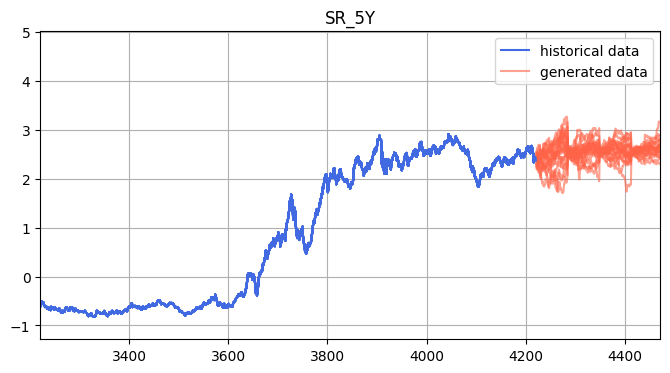

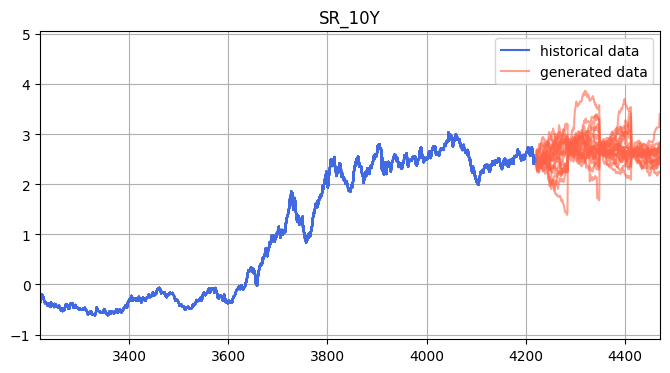

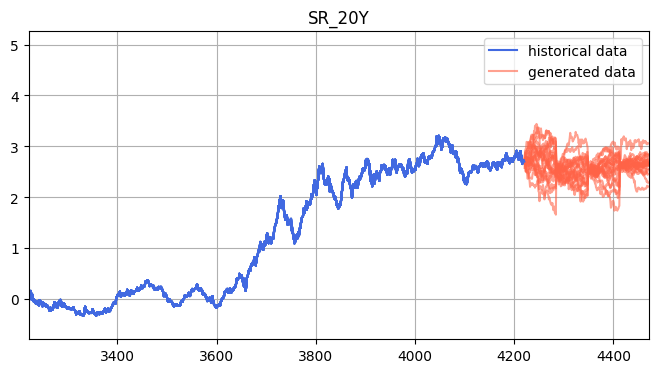

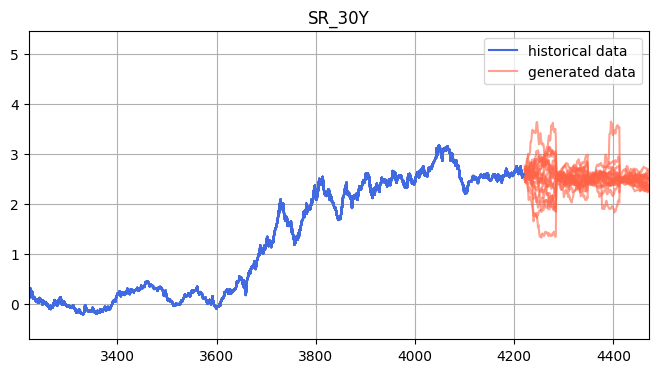

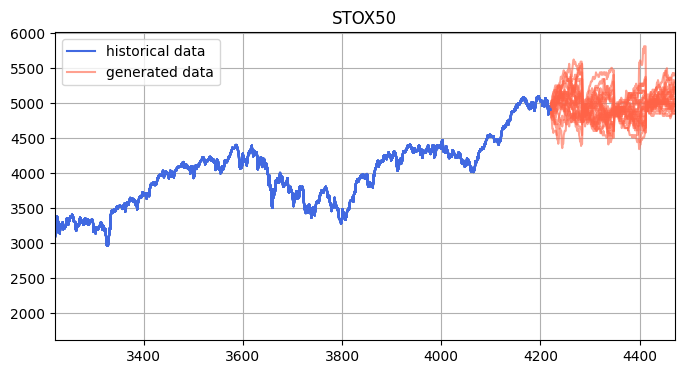

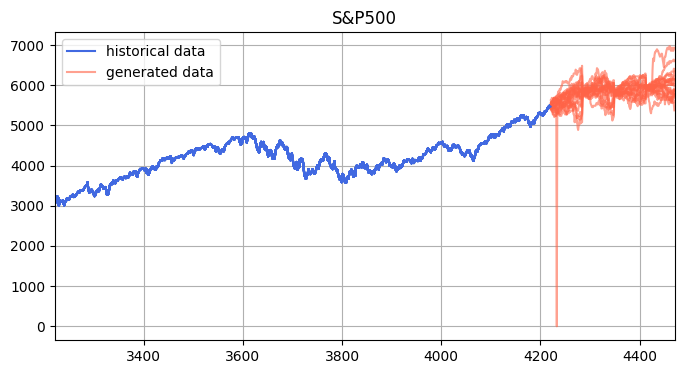

In [27]:
nb_scenario=20
for column in df.columns[1:]:
  plt.figure(figsize=(8, 4))
  context = torch.tensor(df[column])
  prediction_length = 250
  forecast = pipeline.predict(context, prediction_length,limit_prediction_length=False)  # shape [num_series, num_samples, prediction_length]

  # visualize the forecast
  forecast_index = range(len(df), len(df) + prediction_length,)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)


  for i in range(nb_scenario):

    glabel = "generated data" if i == 0 else ""
    hlabel = "historical data" if i == 0 else ""

    plt.plot(df[column], color="royalblue", label=hlabel)
    plt.plot(forecast_index, forecast[0].numpy()[i], color="tomato", label=glabel,alpha=0.6)
    plt.xlim(len(df)-4*prediction_length, len(df)+prediction_length)
    #plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")


  plt.grid()

  plt.title(f'{column} <longueur prévisionnelle> {prediction_length}')

  plt.legend()
  plt.show()

(1, 20, 250)

Un Observe neamoins les limites lors de l'augmentation de la taille de la prediction ou les scenario se stabilise sur une valeur et reste plus ou moins contstant

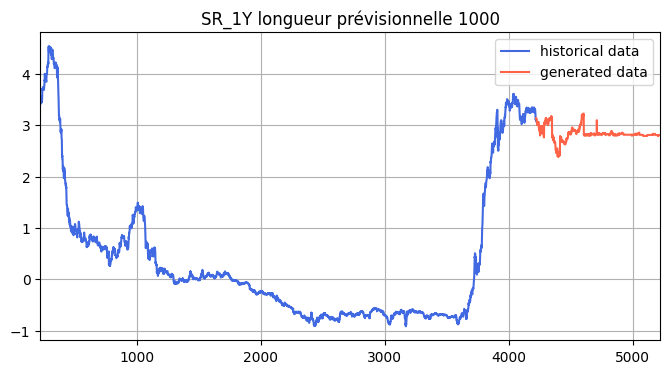

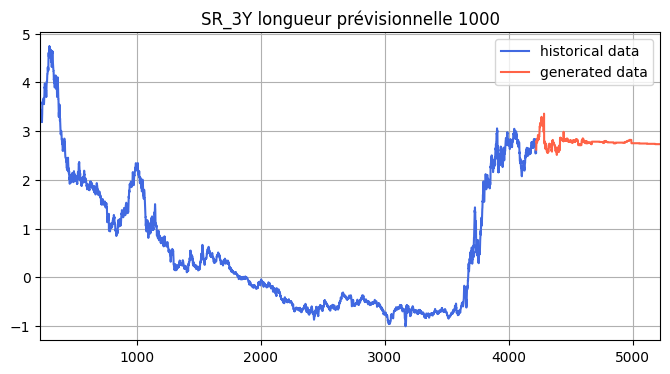

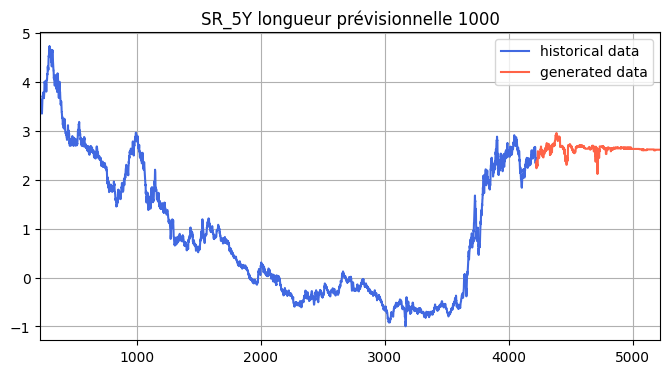

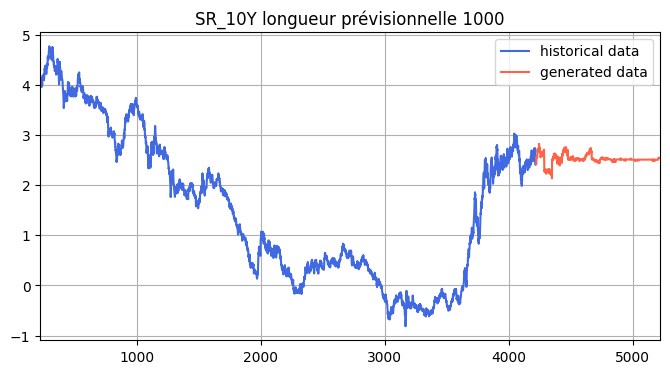

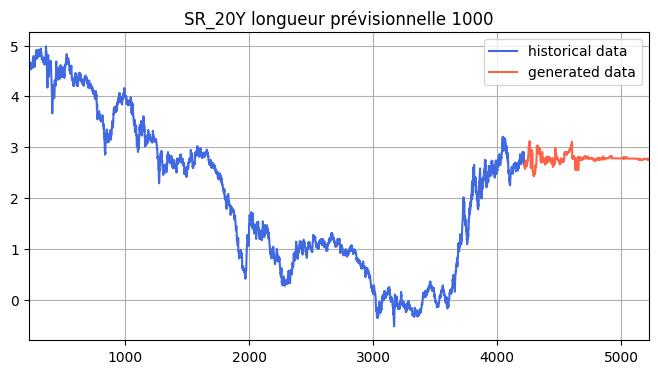

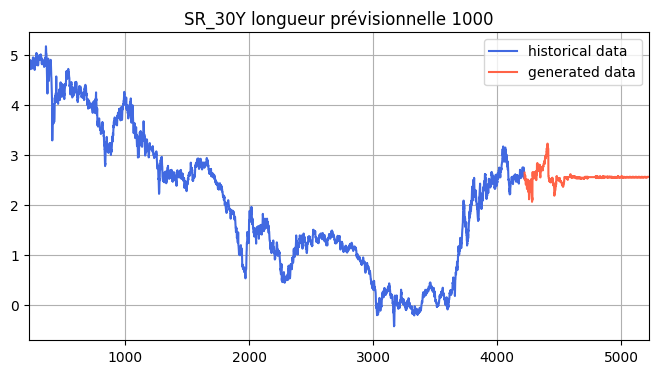

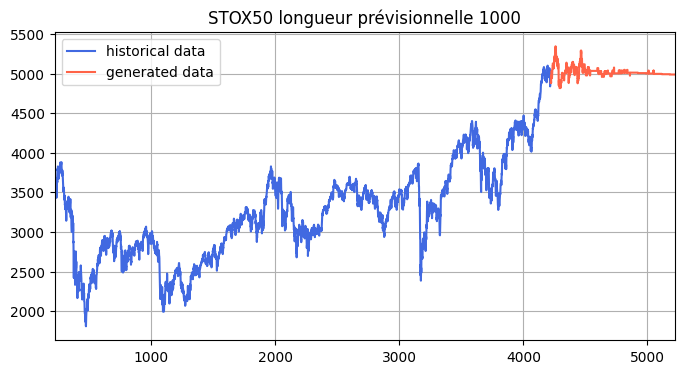

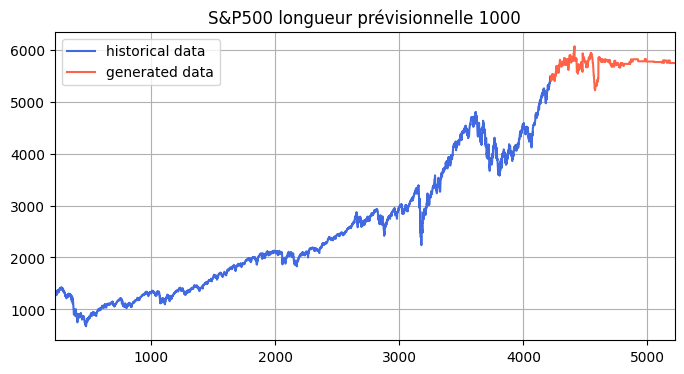

In [9]:
nb_scenario=1
for column in df.columns[1:]:
  plt.figure(figsize=(8, 4))
  context = torch.tensor(df[column])
  prediction_length = 1000
  forecast = pipeline.predict(context, prediction_length,limit_prediction_length=False)  # shape [num_series, num_samples, prediction_length]

  # visualize the forecast
  forecast_index = range(len(df), len(df) + prediction_length,)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)


  for i in range(nb_scenario):


    plt.plot(df[column], color="royalblue", label="historical data")
    plt.plot(forecast_index, forecast[0].numpy()[i], color="tomato", label="generated data",alpha=1)
    plt.xlim(len(df)-4*prediction_length, len(df)+prediction_length)
    #plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")

  plt.legend()
  plt.title(f'{column} longueur prévisionnelle {prediction_length}')
  plt.grid()
  plt.show()

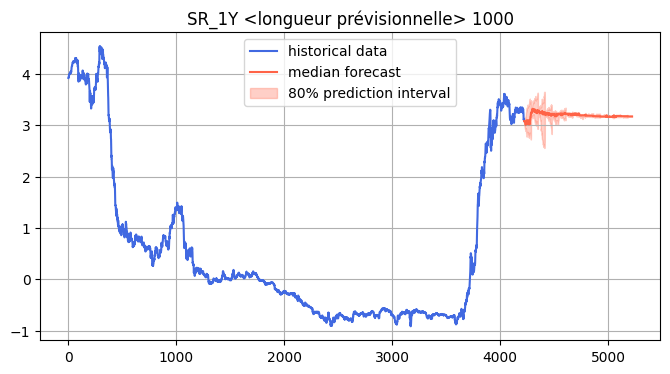

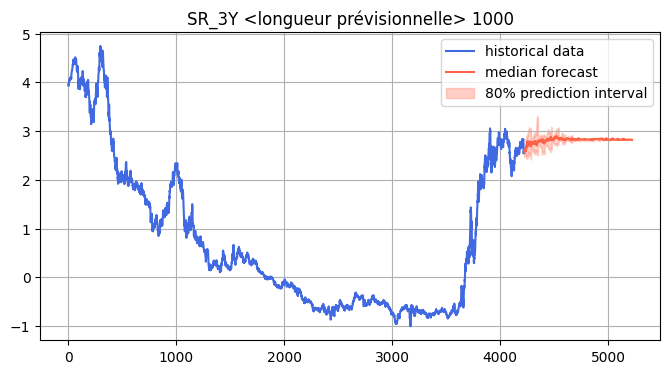

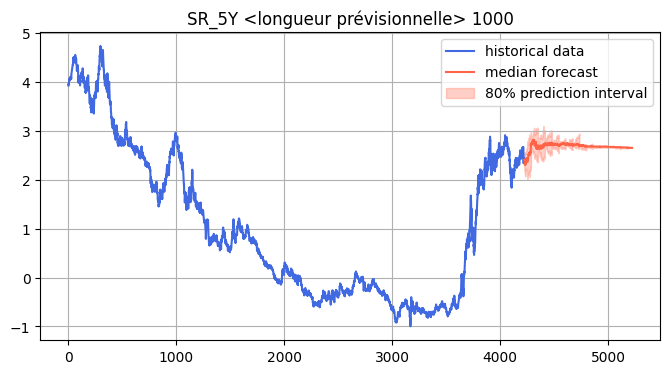

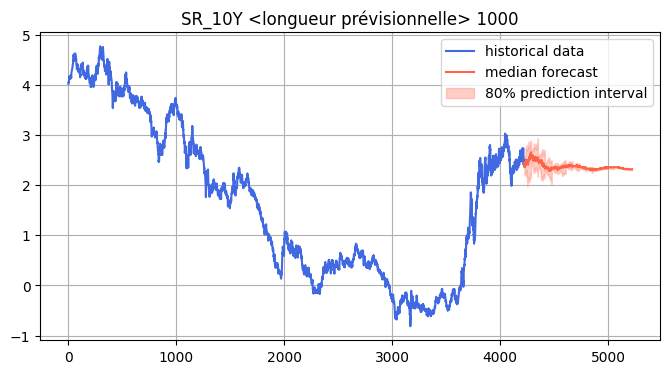

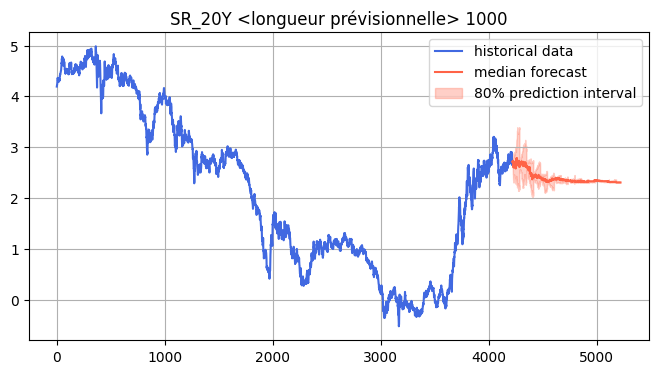

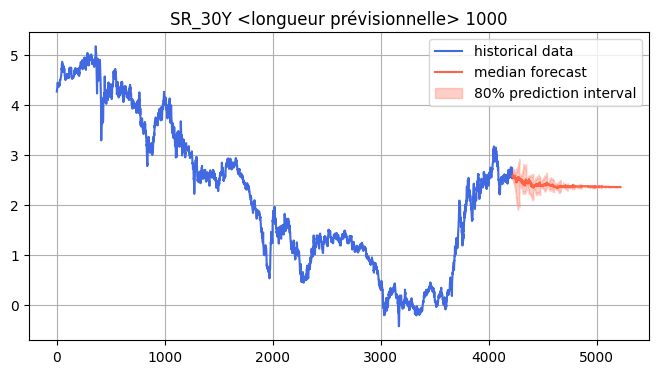

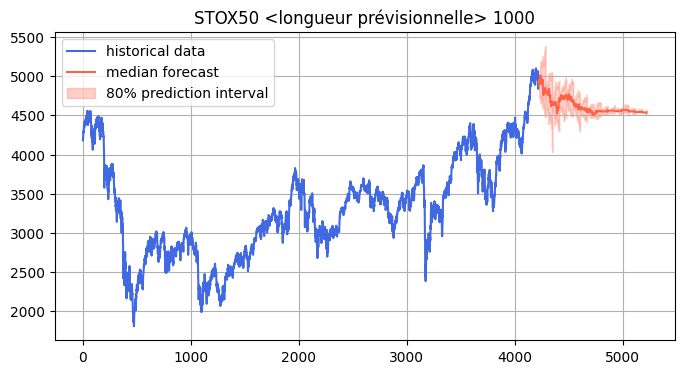

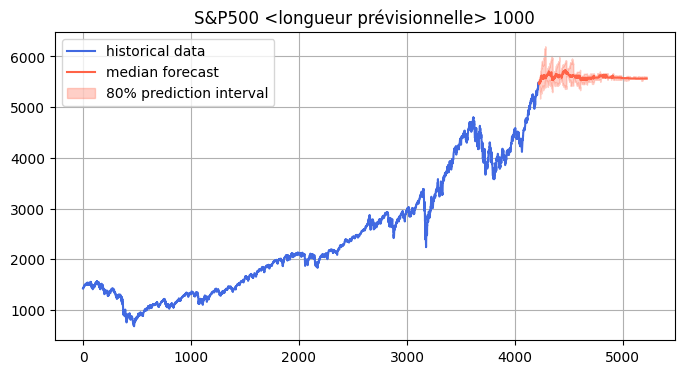

In [10]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
for column in df.columns[1:]:

  context = torch.tensor(df[column])
  prediction_length = 1000
  forecast = pipeline.predict(context, prediction_length,limit_prediction_length=False)  # shape [num_series, num_samples, prediction_length]

  # visualize the forecast
  forecast_index = range(len(df), len(df) + prediction_length,)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

  plt.figure(figsize=(8, 4))
  plt.plot(df[column], color="royalblue", label="historical data")
  plt.plot(forecast_index, median, color="tomato", label="median forecast")
  plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
  plt.legend()
  plt.title(f'{column} <longueur prévisionnelle> {prediction_length}')
  plt.grid()
  plt.show()
